In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import requests
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

In [72]:
pd.__version__

'2.2.2'

# Loading Data

In [7]:


url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'
response = requests.get(url)

# Save the content to a file
with open('laptops.csv', 'wb') as file:
    file.write(response.content)

print("Download complete!")
# Read the CSV file
data = pd.read_csv('laptops.csv')

# Display the first few rows of the data


Download complete!


In [11]:
data.sample(5)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
703,Dell Latitude E7470 Intel Core i5-6200U/16GB/...,Refurbished,Dell,Latitude,Intel Core i5,16,256,SSD,NaN,14.0,No,499.00
619,ASUS E510MA-EJ1188W Intel Celeron N4020/8GB/25...,New,Asus,E510,Intel Celeron,8,256,SSD,NaN,15.6,No,329.99
1293,Acer Extensa 15 EX215-54-50UV Intel Core i5-11...,New,Acer,Extensa,Intel Core i5,8,512,SSD,NaN,15.6,No,541.55
832,ASUS VivoBook 15 F1502ZA-EJ1119W Intel Core i7...,New,Asus,VivoBook,Intel Core i7,8,512,SSD,NaN,15.6,No,635.01
470,MSI Raider GE68HX 13VF-044ES Intel Core i9-139...,New,MSI,Raider,Intel Core i9,32,1000,SSD,RTX 4060,16.0,No,2899.00


## Question 1: How many records are in the dataset?

In [9]:
print(f"There are {data.shape[0]}  records in the dataset ")

There are 2160  records in the dataset 


## Q3. Laptop brands
How many laptop brands are presented in the dataset?

In [14]:
print(f" There are  {data['Brand'].nunique()} unique laptop brands in the dataset")

 There are  27 unique laptop brands in the dataset


## Q4. Missing values
How many columns in the dataset have missing values?

In [16]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Count how many columns have missing values
columns_with_missing_values = (missing_values > 0).sum()

print(f"Number of columns with missing values: {columns_with_missing_values}")


Number of columns with missing values: 3


## Q5. Maximum final price
What's the maximum final price of Dell notebooks in the dataset?

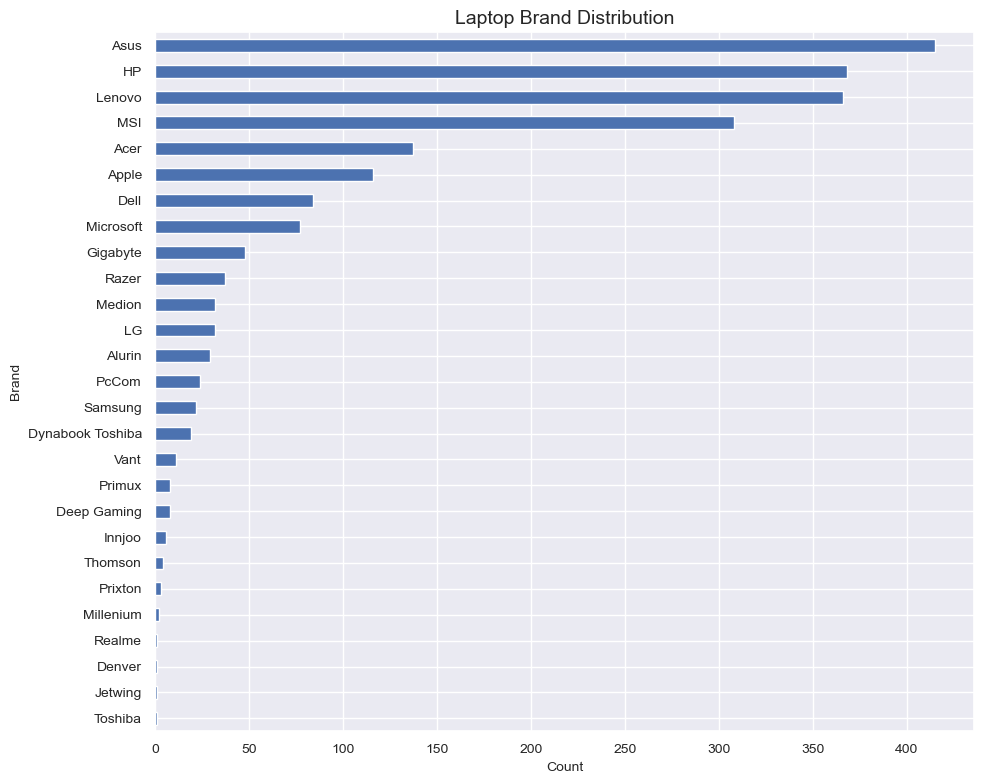

In [50]:
# Set the figure size
plt.figure(figsize=(10, 8))
data['Brand'].value_counts(). sort_values().plot(kind="barh")
# Set labels and title
plt.xlabel("Count", fontsize=10)
plt.ylabel("Brand", fontsize=10)
plt.title("Laptop Brand Distribution", fontsize=14)

# Improve label readability by setting rotation and font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [37]:
# Filter for Dell notebooks
dell_notebooks = data.query('Brand.str.startswith("Dell")', engine='python')
dell_notebooks
# Find the maximum final price (assuming the column is named 'final_price')
max_final_price = dell_notebooks['Final Price'].max()

print(f"The maximum final price of Dell notebooks is: {max_final_price}")



The maximum final price of Dell notebooks is: 3936.0


# Q6. Median value of Screen
* Find the median value of Screen column in the dataset.
* Next, calculate the most frequent value of the same Screen column.
* Use fillna method to fill the missing values in Screen column with the most frequent value from the previous step.
* Now, calculate the median value of Screen once again.
Has it changed?

In [53]:
# Calculate the median of the 'Screen' column
median_screen_before = data['Screen'].median()
print(f"Median value of the 'Screen' column (before filling missing values): {median_screen_before}")


# Find the most frequent (mode) value of the 'Screen' column
most_frequent_screen = data['Screen'].mode()[0]
print(f"Most frequent value of the 'Screen' column: {most_frequent_screen}")

# Fill missing values in 'Screen' column with the most frequent value
data['Screen'].fillna(most_frequent_screen, inplace=True)

# Calculate the median of the 'Screen' column again after filling missing values
median_screen_after = data['Screen'].median()
print(f"Median value of the 'Screen' column (after filling missing values): {median_screen_after}")


if median_screen_before == median_screen_after:
    print("The median value of the 'Screen' column has not changed.")
else:
    print("The median value of the 'Screen' column has changed.")



Median value of the 'Screen' column (before filling missing values): 15.6
Most frequent value of the 'Screen' column: 15.6
Median value of the 'Screen' column (after filling missing values): 15.6
The median value of the 'Screen' column has not changed.


In [71]:
# Step 1: Select 'Innjoo' laptops and only 'RAM', 'Storage', 'Screen' columns
X = data.query('Brand == "Innjoo"')[['RAM', 'Storage', 'Screen']].to_numpy()

# Step 2: Compute XTX (matrix-matrix multiplication of X.T and X)
XTX = X.T @ X

# Step 3: Compute the inverse of XTX
XTX_inv = np.linalg.inv(XTX)

# Step 4: Create the array y
y = np.array([1100, 1300, 800, 900, 1000, 1100])

# Step 5: Multiply the inverse of XTX with the transpose of X, then with y to get w
w = XTX_inv @ X.T @ y

# Step 6: Compute the sum of all the elements of w
sum_of_w = w.sum()

print(f"Sum of all elements of w: {sum_of_w}")


Sum of all elements of w: 91.29988062995815
